In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines import CoxPHFitter

In [2]:
survFuncStata = pd.read_stata('baselineHazard.dta')
survFuncStata = survFuncStata.loc[survFuncStata.baseHaz.notnull()]
survFuncStata = survFuncStata.loc[survFuncStata.t_end.notnull()]

baselineStataTVC = pd.read_stata('baselineHazardTVC.dta')
baselineStataTVC = baselineStataTVC.loc[baselineStataTVC.baseHazTVC.notnull()]
baselineStataTVC = baselineStataTVC.loc[baselineStataTVC.t_end.notnull()]


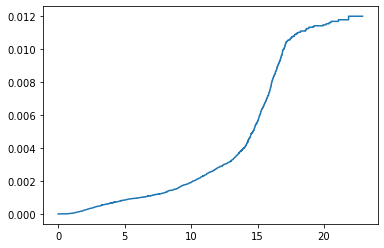

In [3]:
# full cumulative hazard function
tStata = survFuncStata.t_end
baseHazStata = survFuncStata.baseHaz

plt.plot(tStata, baseHazStata)

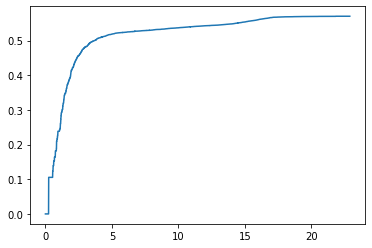

In [4]:
# full cumulative hazard function in TVC model
tStataTVC = baselineStataTVC.t_end
baseHazStataTVC = baselineStataTVC.baseHazTVC

plt.plot(tStataTVC, baseHazStataTVC)

In [5]:
limitStata = survFuncStata.loc[survFuncStata.t_end > 13].iloc[0].name
limitStataTVC = baselineStataTVC.loc[baselineStataTVC.t_end > 13].iloc[0].name


[1.33371239e-05 5.64485841e-05 1.13407058e-04]


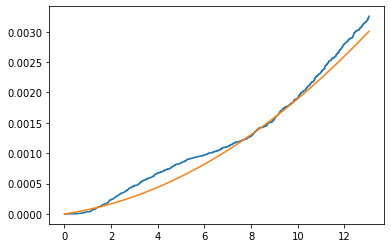

In [6]:
tStata = survFuncStata.t_end[0:limitStata]
baseHazStata = survFuncStata.baseHaz[0:limitStata]

plt.plot(tStata, baseHazStata)

fit = np.polyfit(tStata, baseHazStata,  deg=2)
print(fit)
plt.plot(tStata, fit[0]*tStata**2 + fit[1]*tStata)

plt.savefig('baselineHazardQuadraticStata.pdf')

[0.10377224 0.32171449]


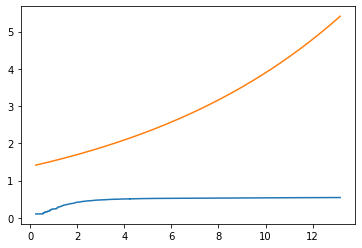

In [7]:
baselineStataTVC = baselineStataTVC.loc[baselineStataTVC.baseHazTVC > 0.0]

tStataTVC = baselineStataTVC.t_end[0:limitStata]
baseHazStataTVC = baselineStataTVC.baseHazTVC[0:limitStata]

plt.plot(tStataTVC, baseHazStataTVC)

fit = np.polyfit(np.log(tStataTVC), baseHazStataTVC,  deg=1)
print(fit)
plt.plot(tStataTVC, np.exp(fit[0]*tStataTVC + fit[1]))

plt.savefig('baselineHazardStataTVC.pdf')

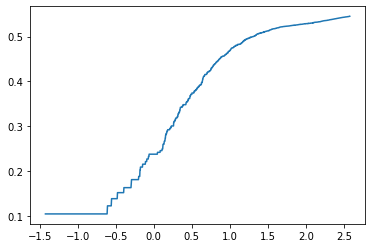

In [8]:
plt.plot(np.log(tStataTVC), baseHazStataTVC)



In [9]:
np.log(fit[0]*tStataTVC + fit[1])

90     -1.059257
91     -1.058420
92     -1.057612
93     -1.056806
94     -1.055165
          ...   
8035    0.523551
8036    0.523557
8037    0.523717
8038    0.523723
8039    0.523723
Name: t_end, Length: 7910, dtype: float64

In [10]:
baseHazStataTVC

90      0.105437
91      0.105437
92      0.105437
93      0.105437
94      0.105437
          ...   
8035    0.545081
8036    0.545081
8037    0.545081
8038    0.545107
8039    0.545107
Name: baseHazTVC, Length: 7910, dtype: float32

[ 0.00023723 -0.00034708]


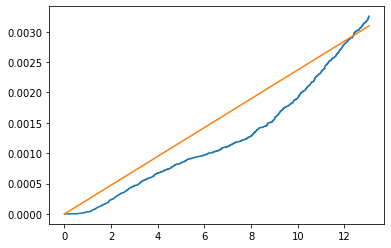

In [11]:
tStata = survFuncStata.t_end[0:limitStata]
baseHazStata = survFuncStata.baseHaz[0:limitStata]

plt.plot(tStata, baseHazStata)

linearFit = np.polyfit(tStata, baseHazStata,  deg=1)
print(linearFit)
plt.plot(tStata, linearFit[0]*tStata)

plt.savefig('baselineHazardLinearStata.pdf')

[ 0.00019481 -0.00012394]


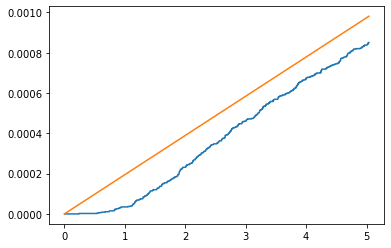

In [12]:

limitStata = survFuncStata.loc[survFuncStata.t_end > 5].iloc[0].name
tStata = survFuncStata.t_end[0:limitStata]
baseHazStata = survFuncStata.baseHaz[0:limitStata]

plt.plot(tStata, baseHazStata)

linearFitShort = np.polyfit(tStata, baseHazStata,  deg=1)
print(linearFitShort)
plt.plot(tStata, linearFitShort[0]*tStata)

plt.savefig('baselineHazardLinearShortStata.pdf')

In [13]:
tRange = np.arange(0, 2, 1)
fit[0]*tRange**2 + fit[1]*tRange

array([0.        , 0.42548674])

In [14]:
survFuncStata.loc[(survFuncStata.t_end >= 0.99) & (survFuncStata.t_end <= 1.01)]

,t_end,baseHaz,baseSurv,surv
372,0.9911,0.000035,0.999965,0.999965
373,0.9938,0.000035,0.999965,0.999965
374,0.9966,0.000035,0.999965,0.999965
375,0.9993,0.000035,0.999965,0.999965
376,1.0021,0.000035,0.999965,0.999965
377,1.0048,0.000035,0.999965,0.999965
378,1.0075,0.000035,0.999965,0.999965
379,1.0075,0.000035,0.999965,0.999965


In [14]:
survFuncStata

,t_end,baseHaz,surv
1,0.0027,0.000000,1.000000
2,0.0055,0.000000,1.000000
3,0.0082,0.000000,1.000000
4,0.0110,0.000000,1.000000
5,0.0137,0.000000,1.000000
...,...,...,...
11620,22.8693,0.011993,0.988007
11621,22.8720,0.011993,0.988007
11622,22.8775,0.011993,0.988007
11623,22.8802,0.011993,0.988007


In [12]:
tStata[0::10]

1        0.0027
11       0.0301
21       0.0575
31       0.0821
41       0.1068
         ...   
7906    12.9993
7916    13.0075
7926    13.0158
7936    13.0294
7946    13.0403
Name: t_end, Length: 791, dtype: float64

In [19]:
survFuncSAS = pd.read_sas('bl_surfunc_200618.sas7bdat')

In [20]:
survFuncSAS.head()

,newid,female0,racebpcog,age,gcp_bl,educ,gcp_slope,t_end,S,S_lower,S_upper,cumhaz,lower_haz,upper_haz
0,b'F231120aric',0.0,2.0,58.996578,53.57,3.0,-0.019506,0.0000,1.000000,NaN,NaN,0.000000,NaN,NaN
1,b'F231120aric',0.0,2.0,58.996578,53.57,3.0,-0.019506,0.2409,0.999985,0.999956,1.000000,0.000015,0.000002,0.000107
2,b'F231120aric',0.0,2.0,58.996578,53.57,3.0,-0.019506,0.5448,0.999970,0.999929,1.000000,0.000030,0.000007,0.000120
3,b'F231120aric',0.0,2.0,58.996578,53.57,3.0,-0.019506,0.5749,0.999955,0.999905,1.000000,0.000045,0.000014,0.000139
4,b'F231120aric',0.0,2.0,58.996578,53.57,3.0,-0.019506,0.6215,0.999941,0.999882,0.999999,0.000059,0.000022,0.000160


In [21]:
#limit = len(survFunc)

limit = survFuncSAS.loc[survFuncSAS.t_end > 13].iloc[0].name

In [22]:
limit

778

[-8.70341070e-05 -4.14035891e-04  9.99326426e-01]


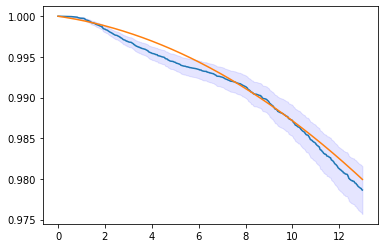

In [23]:
t = survFuncSAS.t_end[:limit]
surv = survFunc.S[:limit]

plt.plot(t, surv)
plt.fill_between(t, survFuncSAS.S_lower[:limit], survFuncSAS.S_upper[:limit], color='b', alpha=.1)

fit = np.polyfit(t, surv,  deg=2)
print(fit)
plt.plot(t, fit[0]*t**2 + fit[1]*t+1)

plt.savefig('baselinesurvival.pdf')

In [2]:
import numpy as np
np.exp(3)

20.085536923187668

In [3]:
0.01*np.exp(3)

0.2008553692318767